<a href="https://colab.research.google.com/github/jamesgolden1/llms-are-llms/blob/main/notebooks/qwen_3_8B_locally_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install -U bitsandbytes
# !pip install -U "huggingface_hub[hf_xet]"
!pip install "huggingface_hub[hf_transfer]"

In [2]:
import os
from google.colab import userdata

os.environ["HF_HUB_ENABLE_HF_TRANSFER"]='1'
os.environ["HF_TOKEN"] = userdata.get('HF_TOKEN')
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

In [6]:
# analyzer.model.lm_head.weight[0].dtype == torch.float16

In [7]:
# list(range(1,32,5))

In [8]:
# list(range(1,32))

In [9]:
#@title Run Jacobian Analysis
%%time
# %%writefile run_llama.py
import os
import gc
import torch
import argparse

from JacobianAnalyzer import *
# from model_forward_llama import *

# def get_huggingface_token():
#     parser = argparse.ArgumentParser()
#     parser.add_argument("--hf_token", help="Hugging Face token (optional if set as environment variable)")
#     args = parser.parse_args()

#     token = os.environ.get("HF_TOKEN") or args.hf_token
#     if not token:
#         print("No Hugging Face token found. Please either:")
#         print("1. Set the HF_TOKEN environment variable:")
#         print("   - Linux/Mac: export HF_TOKEN='your_token_here'")
#         print("   - Windows: set HF_TOKEN=your_token_here")
#         print("2. Or pass the token as an argument: --hf_token 'your_token_here'")
#         exit(1)
#     else:
#         os.environ["HF_TOKEN"] = token

#     return token

# # def main():
# token = get_huggingface_token()

# setattr(JacobianAnalyzer, 'model_forward', model_forward)

# Initialize the analyzer
analyzer = JacobianAnalyzer(model_name="Qwen/Qwen3-8B")#model_name="unsloth/gemma-3-27b-it-bnb-4bit")

# text = 'The Golden'
text = 'The bridge out of Marin is the'
max_new_tokens=1
temperature=1e-6

# Generate output
analyzer.generate(text, max_new_tokens, temperature);

# analyzer.model.lm_head.to('cpu')

# gc.collect()
# torch.cuda.empty_cache()

# # # Compute Jacobian
# analyzer.compute_jacobian()
# # analyzer.compute_jacobian_nonlinear()
# # analyzer.plot_jacobian_comparison(text,filename_png="fig3")

# # analyzer.compute_jacobian_row_col_norm(n_components=8)#, svs=1)
# # analyzer.plot_singular_values(mode="row_col_vectors",filename_png="fig4_col_llama_3_2")

# analyzer.compute_jacobian_svd(n_components=24, svs=1)
# analyzer.plot_singular_values(title="SVD",filename_png="fig4_svd_llama_3_2")

# # analyzer.plot_jacobian_image(filename_png="fig2")

# layerlist=list(range(1,32))
# # layerlist.extend([26,27])
# analyzer.compute_jacobian_layers_svd(layerlist=layerlist,n_components=24,svs=8)#,filename="fig5_svd_layers_llama_3_2")
# analyzer.plot_singular_values(title="SVD Layers",mode='singular_vectors_layers',key='layer',filename_png="fig4_svd_llama_3_2_layers")

# # analyzer.compute_jacobian_layers_svd(layerlist=layerlist,n_components=4,svs=2,key='mlp')#,filename="fig5_svd_layers_llama_3_2_mlp")
# # analyzer.plot_singular_values(title="SVD MLP",mode='singular_vectors_layers',key='mlp',filename_png="fig4_svd_llama_3_2_mlp")

# # analyzer.compute_jacobian_layers_svd(layerlist=layerlist,n_components=4,svs=2,key='attn')#,filename="fig5_svd_layers_llama_3_2_attn")
# # analyzer.plot_singular_values(title="SVD Attn",mode='singular_vectors_layers',key='attn',filename_png="fig4_svd_llama_3_2_attn")

# analyzer.plot_path(filename_png="fig_path")
# # analyzer.plot_dimensionality(filename_png="fig_dimensionality")

# # analyzer.compute_jacobian_layers_svd(layerlist=layerlist,layer_mode='layerwise',n_components=4,svs=2)#,filename="fig5_svd_layers_llama_3_2")
# # analyzer.plot_singular_values(title="SVD Layers",mode='singular_vectors_layers_layerwise',key='layer',filename_png="fig4_svd_llama_3_2_layers_layerwise")

# # analyzer.compute_jacobian_layers_svd(layerlist=layerlist,layer_mode='layerwise',n_components=4,svs=2,key='mlp')#,filename="fig5_svd_layers_llama_3_2_mlp")
# # analyzer.plot_singular_values(title="SVD MLP",mode='singular_vectors_layers_layerwise',key='mlp',filename_png="fig4_svd_llama_3_2_mlp_layerwise")

# # analyzer.compute_jacobian_layers_svd(layerlist=layerlist,layer_mode='layerwise',n_components=4,svs=2,key='attn')#,filename="fig5_svd_layers_llama_3_2_attn")
# # analyzer.plot_singular_values(title="SVD Attn",mode='singular_vectors_layers_layerwise',key='attn',filename_png="fig4_svd_llama_3_2_attn_layerwise")

# # analyzer.plot_path(filename_png="fig_dimensionality")

# # to do
# # layer_input for mlp
# # dimensionality fig can pull from layerwise

# # if __name__ == "__main__":
# #     main()

tokenizer_config.json:   0%|          | 0.00/9.68k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/728 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/32.9k [00:00<?, ?B/s]

model-00001-of-00005.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00002-of-00005.safetensors:   0%|          | 0.00/3.99G [00:00<?, ?B/s]

model-00003-of-00005.safetensors:   0%|          | 0.00/3.96G [00:00<?, ?B/s]

model-00004-of-00005.safetensors:   0%|          | 0.00/3.19G [00:00<?, ?B/s]

model-00005-of-00005.safetensors:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

CPU times: user 46.8 s, sys: 1min 18s, total: 2min 5s
Wall time: 1min 12s


In [10]:

# Store the weights on CPU
# stored_weights = analyzer.model.lm_head.weight.detach().cpu()

# # Explicitly delete the weight tensor
# del model.lm_head.weight

# # Delete the original layer
# del model.lm_head



In [11]:
# Replace with Identity layer
# analyzer.model.lm_head = torch.nn.Identity()

In [12]:

# analyzer.model.lm_head.to('cpu')

# gc.collect()
# torch.cuda.empty_cache()


In [13]:
analyzer.model.lm_head.weight[0,0]

tensor(-0.0381, device='cuda:0', dtype=torch.bfloat16,
       grad_fn=<SelectBackward0>)

In [14]:
!nvidia-smi

Wed May  7 21:49:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   47C    P0             32W /   72W |   15883MiB /  23034MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [15]:
gc.collect()
torch.cuda.empty_cache()

In [16]:
!nvidia-smi

Wed May  7 21:49:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   47C    P0             33W /   72W |   15881MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [17]:
%%time
# Compute Jacobian
analyzer.compute_jacobian()

CPU times: user 10 s, sys: 2.39 s, total: 12.4 s
Wall time: 12.4 s


tensor([-0.3848, -1.1016, -0.9414,  ..., -0.6875, -0.0549,  0.2246],
       device='cuda:0', dtype=torch.bfloat16, grad_fn=<SumBackward1>)

In [18]:
gc.collect()
torch.cuda.empty_cache()

In [19]:
analyzer.model.lm_head.weight[0].dtype

torch.bfloat16

In [20]:

# setattr(JacobianAnalyzer, 'plot_singular_values', plot_singular_values)

In [21]:
analyzer.output_token

'The bridge out of Marin is the only'

Mode: singular_vectors


/content/JacobianAnalyzer.py:1039: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/content/JacobianAnalyzer.py:1039: UserWarning: Glyph 181399 (\N{CJK UNIFIED IDEOGRAPH-2C497}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/content/JacobianAnalyzer.py:1039: UserWarning: Glyph 119258 (\N{MUSICAL SYMBOL PORRECTUS FLEXUS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/content/JacobianAnalyzer.py:1039: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/content/JacobianAnalyzer.py:1039: UserWarning: Glyph 26725 (\N{CJK UNIFIED IDEOGRAPH-6865}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/content/JacobianAnalyzer.py:1039: UserWarning: Glyph 27211 (\N{CJK UNIFIED IDEOGRAPH-6A4B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/content/JacobianAnalyzer.py:1046: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.savefig(f"{filename}.pdf", bbox_inche

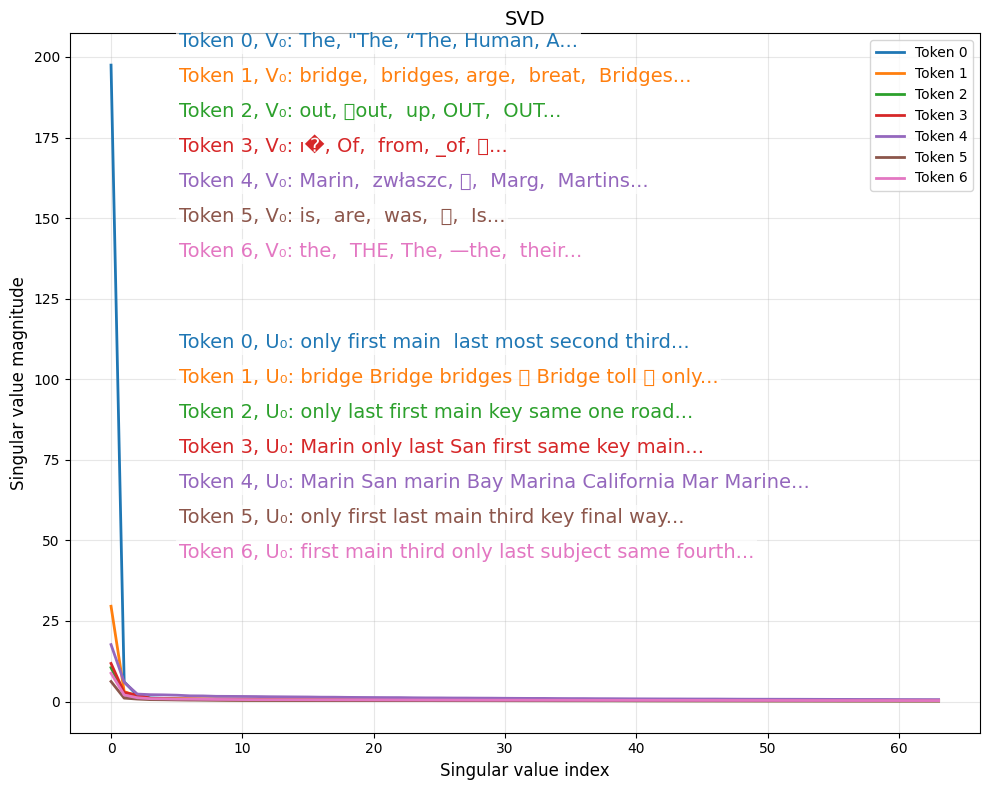

In [24]:
# analyzer.compute_jacobian_svd(n_components=64, svs=1)
analyzer.plot_singular_values(title="SVD", textsize=14,filename="fig4_svd_qwen_3_8b_large")

Mode: singular_vectors


<ipython-input-31-e4a62f59b25b>:164: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-31-e4a62f59b25b>:171: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.savefig(f"{filename}.pdf", bbox_inches='tight')
<ipython-input-31-e4a62f59b25b>:171: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.savefig(f"{filename}.pdf", bbox_inches='tight')
<ipython-input-31-e4a62f59b25b>:172: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.savefig(f"{filename}.svg", bbox_inches='tight')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


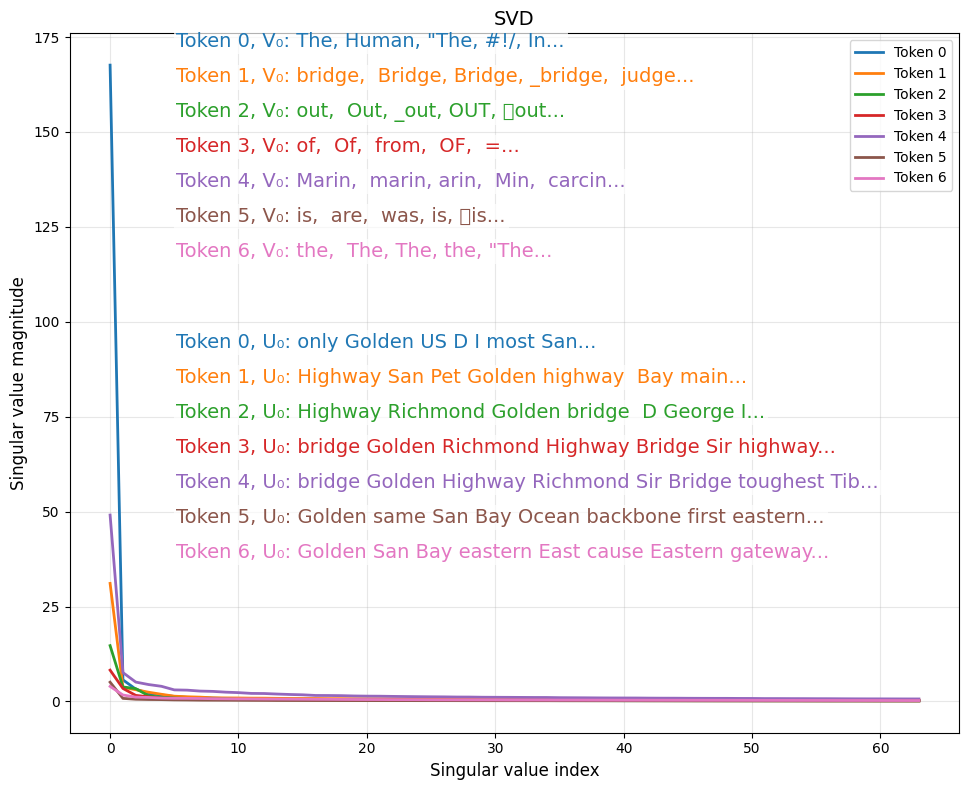

In [ ]:

analyzer.plot_singular_values(title="SVD",textsize=14,filename="fig4_svd_qwen_3_32b_large")

Computing SVD for token position 0
Computing SVD for token position 1
Token 0, SV 0: Ratio State Rule B Gate Age C F
Token 0, SV 0: ['The', '"The', ' The', '#!/', 'Human', '“The', 'package', 'THE']

Token 1, SV 0: Ratio Gate Glob Age State Rule B F
Token 1, SV 0: ['굄', 'Golden', 'golden', '쿅', ' młodzie', ' госуд', '𬟽', '�']

Mode: singular_vectors


/content/JacobianAnalyzer.py:1038: UserWarning: Glyph 44356 (\N{HANGUL SYLLABLE GOEM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/content/JacobianAnalyzer.py:1038: UserWarning: Glyph 53189 (\N{HANGUL SYLLABLE KYOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/content/JacobianAnalyzer.py:1042: UserWarning: Glyph 44356 (\N{HANGUL SYLLABLE GOEM}) missing from font(s) DejaVu Sans.
  plt.savefig(f'{filename_png}.png', bbox_inches='tight')
/content/JacobianAnalyzer.py:1042: UserWarning: Glyph 53189 (\N{HANGUL SYLLABLE KYOG}) missing from font(s) DejaVu Sans.
  plt.savefig(f'{filename_png}.png', bbox_inches='tight')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44356 (\N{HANGUL SYLLABLE GOEM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53189 (\N{HANGUL SYLLABLE KYOG}) missing from font(s) DejaVu Sans.


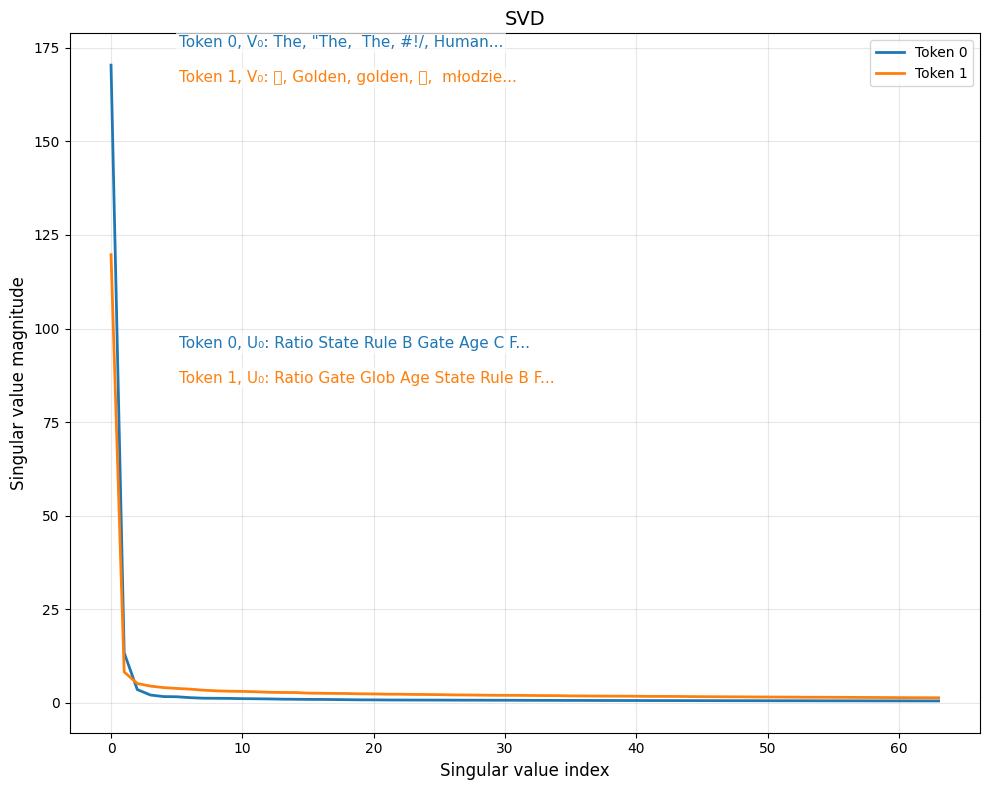

In [ ]:
analyzer.compute_jacobian_svd(n_components=64, svs=1)
analyzer.plot_singular_values(title="SVD",filename_png="fig4_svd_qwen_3_32b")

In [ ]:
gc.collect()
torch.cuda.empty_cache()

In [ ]:
analyzer.model.lm_head.weight[0,0]

tensor(0.0006, device='cuda:0', dtype=torch.float16, grad_fn=<SelectBackward0>)

In [ ]:
analyzer.linear_jacobian_output

tensor([-1.9932,  0.5000,  1.2539,  ..., -1.4453,  0.6685,  3.4902],
       device='cuda:0', dtype=torch.float16, grad_fn=<SumBackward1>)

In [ ]:
analyzer.model_forward(analyzer.embeds)

tensor([-2.0020,  0.5005,  1.2568,  ..., -1.4404,  0.6621,  3.4824],
       device='cuda:0', dtype=torch.float16, grad_fn=<SelectBackward0>)

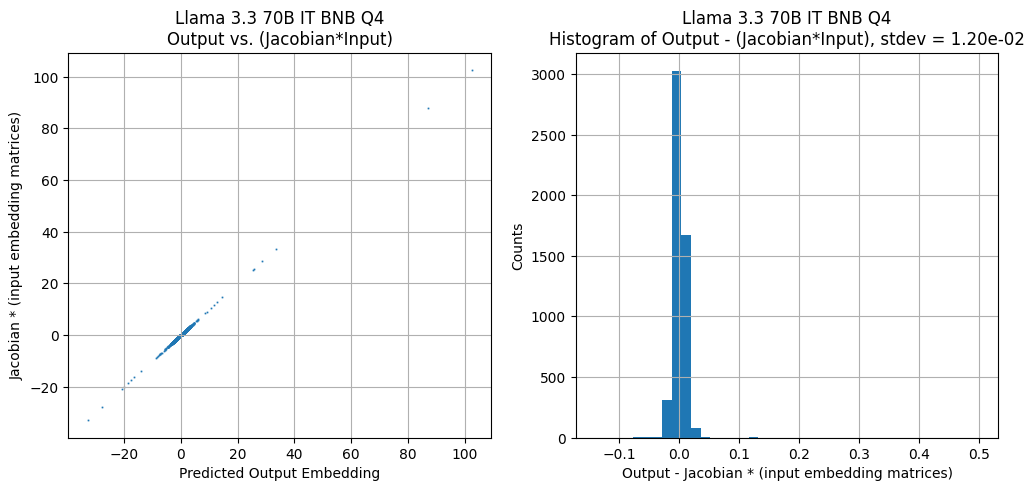

In [ ]:
jacobian_output_error = analyzer.linear_jacobian_output - analyzer.model_forward(analyzer.embeds)#outputs.hidden_states[-1][-1][0, -1]

fig, axs = plt.subplots(1,2,figsize=(12,5))
axs = axs.flat
# print("For lowest Jacobian error, run at float32 precision on an A100. You can also run float32 on CPU on an L4 but it is slow.")
for n, ax in enumerate(axs):

    if n == 0:
        # ax.scatter(outputs.hidden_states[-1][-1][-1][-1].cpu().detach().float().numpy(),\
        ax.scatter(analyzer.model_forward(analyzer.embeds).cpu().detach().float().numpy(),\
                    (analyzer.linear_jacobian_output).cpu().detach().float().numpy(),.2,marker='x');
        ax.set_xlabel('Predicted Output Embedding')
        ax.set_ylabel('Jacobian * (input embedding matrices)')
        ax.set_title('Llama 3.3 70B IT BNB Q4\nOutput vs. (Jacobian*Input)')
        ax.grid()
    if n == 1:
        outnp = jacobian_output_error.cpu().detach().float().numpy()
        ax.hist(outnp,bins=40)#,range=[-20,20])#,range=[-7.5e-6,7.5e-6]);
        ax.set_ylabel('Counts')
        ax.set_xlabel('Output - Jacobian * (input embedding matrices)')
        ax.grid()
        ax.set_title('Llama 3.3 70B IT BNB Q4\nHistogram of Output - (Jacobian*Input), stdev = '+"{val:1.2e}".format(val=np.std(outnp)))